In [1]:
import glob
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
import re
import math
import matplotlib.pyplot as plt


### Preprocessing

In [2]:
authors = ["Alessandri", "Rocca", "Carlotti", "Notini", "Vinciguerra", "Versini", "Piazzoli", "Gianviti"]
disputed = ['Altore']
#testcase = ['P._di_B.']

In [3]:
names = authors + disputed

In [4]:
corpus = {}

for name in names:
    files = glob.glob(f"./Altore/ANALYSE/{name}/*.txt")
    
    text = []
    for file in files:
        if re.search(r"_co_", file):
            with open(file, 'r') as f:
                content = f.readlines()
            
            text.extend(content)
    
    tokenizer = RegexpTokenizer('\w+')
    text = ' '.join(text)
    token = tokenizer.tokenize(text)
    
    corpus[name] = token

In [5]:
for name in names:
    l = corpus[name]
    for w in l:
        if w == 'ss':
            l.remove(w)
    corpus[name] = l

### Computing

In [6]:
whole_corpus = []

for author in authors:
    whole_corpus += corpus[author]

whole_corpus_freq_dist = FreqDist(whole_corpus).most_common(100)
whole_corpus_freq_dist

[('a', 12117),
 ('di', 12032),
 ('e', 11681),
 ('u', 6569),
 ('chi', 5809),
 ('un', 5647),
 ('in', 4065),
 ('si', 3649),
 ('i', 3148),
 ('la', 2714),
 ('so', 2599),
 ('lu', 2246),
 ('ci', 2003),
 ('per', 1982),
 ('da', 1861),
 ('li', 1631),
 ('ne', 1517),
 ('o', 1487),
 ('le', 1460),
 ('una', 1437),
 ('mi', 1295),
 ('piu', 1258),
 ('ma', 1230),
 ('ellu', 908),
 ('cu', 907),
 ('cume', 812),
 ('ha', 723),
 ('ti', 704),
 ('che', 626),
 ('fa', 592),
 ('mio', 562),
 ('me', 533),
 ('pe', 515),
 ('ancu', 512),
 ('corsica', 499),
 ('to', 485),
 ('era', 475),
 ('sempre', 468),
 ('cusi', 467),
 ('ella', 461),
 ('tutti', 441),
 ('unn', 413),
 ('senza', 396),
 ('tu', 381),
 ('po', 350),
 ('vi', 346),
 ('sta', 342),
 ('cio', 341),
 ('qui', 339),
 ('corsu', 329),
 ('aghiu', 309),
 ('io', 307),
 ('noi', 304),
 ('elli', 298),
 ('cun', 295),
 ('ogni', 292),
 ('quellu', 290),
 ('corsi', 289),
 ('mai', 287),
 ('tuttu', 281),
 ('vole', 281),
 ('esse', 273),
 ('paese', 273),
 ('stu', 271),
 ('pocu', 271),


In [7]:
dic_mfw = {}

for k, v in whole_corpus_freq_dist:
    dic_mfw[k] = v

dic_mfw

{'a': 12117,
 'di': 12032,
 'e': 11681,
 'u': 6569,
 'chi': 5809,
 'un': 5647,
 'in': 4065,
 'si': 3649,
 'i': 3148,
 'la': 2714,
 'so': 2599,
 'lu': 2246,
 'ci': 2003,
 'per': 1982,
 'da': 1861,
 'li': 1631,
 'ne': 1517,
 'o': 1487,
 'le': 1460,
 'una': 1437,
 'mi': 1295,
 'piu': 1258,
 'ma': 1230,
 'ellu': 908,
 'cu': 907,
 'cume': 812,
 'ha': 723,
 'ti': 704,
 'che': 626,
 'fa': 592,
 'mio': 562,
 'me': 533,
 'pe': 515,
 'ancu': 512,
 'corsica': 499,
 'to': 485,
 'era': 475,
 'sempre': 468,
 'cusi': 467,
 'ella': 461,
 'tutti': 441,
 'unn': 413,
 'senza': 396,
 'tu': 381,
 'po': 350,
 'vi': 346,
 'sta': 342,
 'cio': 341,
 'qui': 339,
 'corsu': 329,
 'aghiu': 309,
 'io': 307,
 'noi': 304,
 'elli': 298,
 'cun': 295,
 'ogni': 292,
 'quellu': 290,
 'corsi': 289,
 'mai': 287,
 'tuttu': 281,
 'vole': 281,
 'esse': 273,
 'paese': 273,
 'stu': 271,
 'pocu': 271,
 'quandu': 263,
 'quelli': 259,
 'hanu': 251,
 'fattu': 246,
 'par': 245,
 'sera': 243,
 'core': 240,
 'tre': 239,
 'perche': 237,

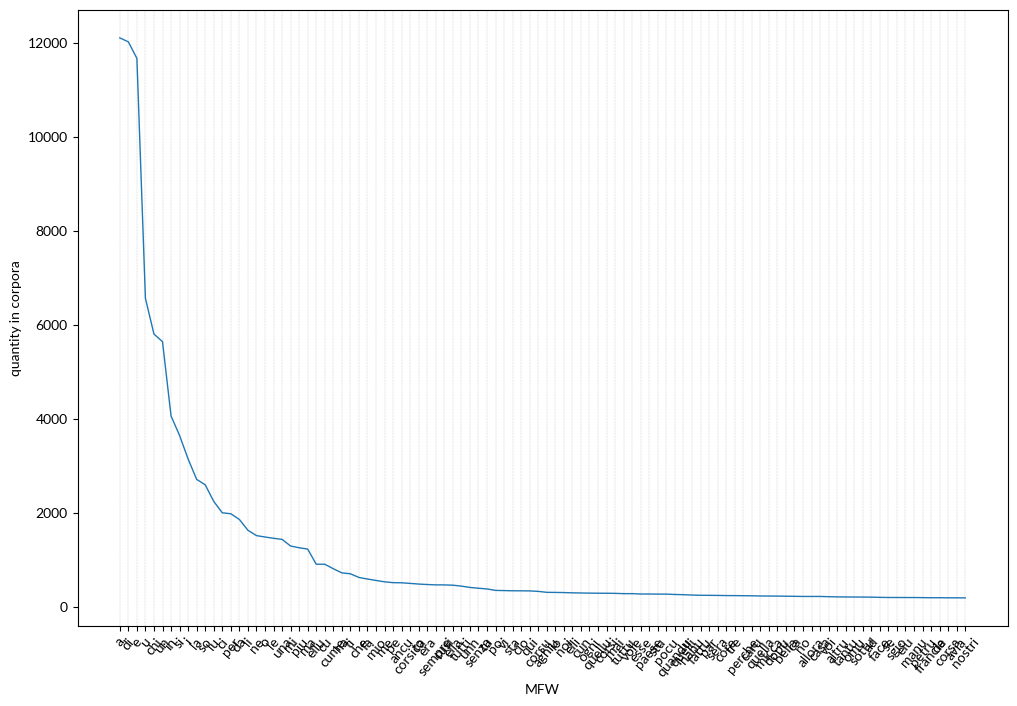

In [8]:
plt.figure(figsize=(12,8))
plt.plot(dic_mfw.keys(), dic_mfw.values(), linewidth=1)


plt.xlabel('MFW', fontname='Lato')
plt.ylabel('quantity in corpora', fontname='Lato')

plt.xticks(fontname='Lato', fontsize=10, rotation = 50)
plt.yticks(fontname='Lato')

plt.grid(color='darkgrey', axis='x', linewidth=0.2, linestyle='-.')

plt.show()

In [9]:
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    feature_freqs[author] = {}

    overall = len(corpus[author])

    for feature in features:
        presence = corpus[author].count(feature)
        feature_freqs[author][feature] = presence / overall

In [10]:
corpus_features = {}

for feature in features:
    corpus_features[feature] = {}

    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

In [11]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

In [12]:
testcase_tokens = corpus["Altore"]

testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature a is 0.549501830286185
Test case z-score for feature di is 0.39508800767499097
Test case z-score for feature e is 0.7156028760508749
Test case z-score for feature u is 0.18263070622187716
Test case z-score for feature chi is 1.3138406546778043
Test case z-score for feature un is 0.1233700936137365
Test case z-score for feature in is 0.027101350553852804
Test case z-score for feature si is 0.04239097446345572
Test case z-score for feature i is 0.8574042756259236
Test case z-score for feature la is -1.3076974491266584
Test case z-score for feature so is -0.45678050230292233
Test case z-score for feature lu is -0.9673120984214474
Test case z-score for feature ci is 0.13423248803942675
Test case z-score for feature per is 1.5080701482196728
Test case z-score for feature da is 0.5105821925767516
Test case z-score for feature li is -0.8580914913431242
Test case z-score for feature ne is -0.18996490886011333
Test case z-score for feature o is -0.45632840477541514

In [13]:
dic_final = {}

for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )
    dic_final[author] = delta

Delta score for candidate Alessandri is 1.2983937312535463
Delta score for candidate Rocca is 0.9431118377101351
Delta score for candidate Carlotti is 0.9185069172216536
Delta score for candidate Notini is 0.8722240442298197
Delta score for candidate Vinciguerra is 1.2148407481654369
Delta score for candidate Versini is 1.128145922583165
Delta score for candidate Piazzoli is 0.9601629733288071
Delta score for candidate Gianviti is 0.8609743084253124


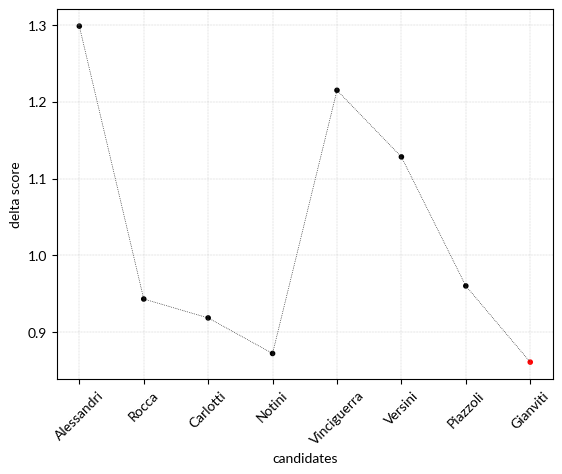

In [15]:
plt.plot(dic_final.keys(), dic_final.values(), linewidth=0.5, color='black', linestyle=':')
plt.scatter(dic_final.keys(), dic_final.values(), marker='.', color=['black', 'black', 'black', 'black', 'black', 'black', 'black', 'red'])

plt.xlabel('candidates', fontname='Lato')
plt.ylabel('delta score', fontname='Lato')

plt.xticks(fontname='Lato', fontsize=10, rotation = 45)
plt.yticks(fontname='Lato')

plt.grid(color='darkgrey', axis='both', linewidth=0.2, linestyle='-.')

plt.show()